# Векторные представления слов. word2vec+

Спасибо огромное Даше Рыжовой и Даше Поповой за часть этой тетрадки!

Мы видели 2 способа векторизации текстов. One-hot encoding и tf-idf.

Это просто, но семантика слов не учитывается, порядок слов тоже не учитывается.

Сегодня решим первую из двух проблем.

### Word2Vec

Одной из самых известных моделей для работы с дистрибутивной семантикой является word2vec. Технология основана на нейронной сети, предсказывающей вероятность встретить слово в заданном контексте. Этот инструмент был разработан группой исследователей Google в 2013 году, руководителем проекта был Томаш Миколов (сейчас работает в Facebook). Вот две самые главные статьи:

+ [Efficient Estimation of Word Representations inVector Space](https://arxiv.org/pdf/1301.3781.pdf)
+ [Distributed Representations of Words and Phrases and their Compositionality](https://arxiv.org/abs/1310.4546)

Полученные таким образом вектора называются распределенными представлениями слов, или **эмбеддингами**.

По-русски понятные объяснения и картинки смотрите [тут](https://habr.com/ru/post/446530/)


2 важные мысли:
1. **Мы можем представить себе что угодно как совокупность признаков.**
- король - муж.: 1, богатый: 1, властный: 1
- королева - муж.: 0, богатый: 1, властный: 1
- нищий - муж.: 1, богатый: 0, властный: 0
- графиня - муж.: 0, богатый: 0.75, властный: 0.75

Если мы захотим различать больше слов, добавится ещё признаков. Например, машина - одушевлённость:0 (а у людей будет 1), транспорт:1 (а у яблока будет 0) и т.д.

(В итоге король - [1 1 1], королева [0 1 1], графиня [0 0.75 0.75]. Сейчас мы сами решили, какая ось нашего многомерного пространства за что отвечает, но оптимально все признаки не расписать, дальше у нас будут абстрактные оси.)

2. **Легко посчитать, насколько близки векторы.**

Для этого нужна косинусная близость.

![img](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/cos%20dist.png)

Найдём косинусную близость между a(4;1) и b(3;5).
$$\frac{a_1*b_1+a_2*b_2}{\sqrt{a_1^2+a_2^2}*\sqrt{b_1^2+b_2^2}}=\frac{4*3+1*5}{\sqrt{4^2+1^2}*\sqrt{3^2+5^2}}=0.7071$$

In [1]:
import math

(4*3+1*5)/(math.sqrt(4**2+1**2)*math.sqrt(3**2+5**2))

0.7071067811865475

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([[4, 1]], [[3, 5]])

array([[0.70710678]])

In [3]:
print(cosine_similarity([[4, 1]], [[4, 1]]))    # самый близкий - 1
print(cosine_similarity([[4, 1]], [[-1, 4]]))   # перпендикулярный - 0
print(cosine_similarity([[4, 1]], [[-4, -1]]))  # противоположный - -1

[[1.]]
[[0.]]
[[-1.]]


<img src="https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/vectors.png" width="350" height="300">

Посмотрим на модель word2vec на сайте [Rusvectores](https://rusvectores.org/ru/calculator/).

#### Как это работает?

Word2vec принимает большой текстовый корпус в качестве входных данных и сопоставляет каждому слову вектор, выдавая координаты слов на выходе. Сначала он создает словарь, «обучаясь» на входных текстовых данных, а затем вычисляет векторное представление слов. Векторное представление основывается на контекстной близости: слова, встречающиеся в тексте рядом с одинаковыми словами (а следовательно, согласно дистрибутивной гипотезе, имеющие схожий смысл), в векторном представлении будут иметь близкие координаты векторов-слов. Для вычисления близости слов используется косинусное близость между их векторами.


С помощью дистрибутивных векторных моделей можно строить семантические пропорции (они же аналогии) и решать примеры:

+ король: мужчина = королева: женщина $\Rightarrow$
+ король - мужчина + женщина = королева

![w2v](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/word2vec.png)

Несколько интересных статей по дистрибутивной семантике (от Даш Поповой и Рыжовой):

* [Turney and Pantel 2010](https://jair.org/index.php/jair/article/view/10640)
* [Lenci 2018](https://www.annualreviews.org/doi/abs/10.1146/annurev-linguistics-030514-125254?journalCode=linguistics)
* [Smith 2019](https://arxiv.org/pdf/1902.06006.pdf)
* [Pennington et al. 2014](https://www.aclweb.org/anthology/D14-1162/)
* [Faruqui et al. 2015](https://www.aclweb.org/anthology/N15-1184/)

#### Как это обучается?

Мы задаём вектор для каждого слова с помощью матрицы $w$ и вектор контекста с помощью матрицы $W$. По сути, word2vec является обобщающим названием для двух архитектур Skip-Gram и Continuous Bag-Of-Words (CBOW).

+ **CBOW** предсказывает текущее слово, исходя из окружающего его контекста.

+ **Skip-gram**, наоборот, использует текущее слово, чтобы предугадывать окружающие его слова.


### Gensim

Использовать предобученную модель эмбеддингов или обучить свою можно с помощью библиотеки `gensim`. Вот ее [документация](https://radimrehurek.com/gensim/models/word2vec.html). `Gensim` — библиотека для тематического моделирования текстов, но один из компонентов в ней — реализация на python алгоритмов из библиотеки word2vec (которая в оригинале была написана на C++).

In [4]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec

import warnings
warnings.filterwarnings('ignore')

#### Как обучить свою модель

NB! Обратите внимание, что тренировка модели не включает препроцессинг! Это значит, что избавляться от пунктуации, приводить слова к нижнему регистру, лемматизировать их, проставлять частеречные теги придется до тренировки модели (если, конечно, это необходимо для вашей задачи). Т.е. в каком виде слова будут в исходном тексте, в таком они будут и в модели.

In [5]:
! pip install pymystem3

In [6]:
from pymystem3 import Mystem
m = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
with open('vojna-i-mir.txt') as f:
    text = f.read()

In [ ]:
lemmas = m.lemmatize(text)
print(' '.join([w for w in lemmas if w.isalpha() or w=='\n'])[:50])

In [ ]:
with open('vojna-i-mir_lemmas.txt', 'w') as f:
    f.write(' '.join([w for w in lemmas if w.isalpha() or w=='\n']))

Поскольку иногда тренировка модели занимает много времени, то можно ещё вести лог событий, чтобы понимать, что на каком этапе происходит.

In [8]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

На вход модели даем текстовый файл, каждое предложение на отдельной строчке. Вот игрушечный пример с текстом «Бедной Лизы». Он заранее очищен от пунктуации, приведен к нижнему регистру и лемматизирован.

In [9]:
f = 'vojna-i-mir_lemmas.txt'
data = gensim.models.word2vec.LineSentence(f)

Инициализируем модель. Основные параметры:

+ данные должны быть итерируемым объектом
+ size — размер вектора,
+ window — размер окна наблюдения,
+ min_count — мин. частотность слова в корпусе,
+ sg — используемый алгоритм обучения (0 — CBOW, 1 — Skip-gram),
+ sample — порог для downsampling'a высокочастотных слов,
+ workers — количество потоков,
+ alpha — learning rate,
+ iter — количество итераций,
+ max_vocab_size — позволяет выставить ограничение по памяти при создании словаря (т.е. если ограничение привышается, то низкочастотные слова будут выбрасываться). Для сравнения: 10 млн слов = 1Гб RAM.

In [19]:
model_vim = gensim.models.Word2Vec(data,
                                   vector_size=300,
                                   window=5,
                                   min_count=2,
                                   epochs=20)

Можно нормализовать вектора, тогда модель будет занимать меньше RAM. Однако после этого её нельзя дотренировывать. Здесь используется L2-нормализация: вектора нормализуются так, что если сложить квадраты всех элементов вектора, в сумме получится 1.

In [ ]:
model_vim.init_sims(replace=True)
model_path = "vim.bin"

print("Saving model...")
model_vim.wv.save_word2vec_format(model_path, binary=True)

Saving model...


Смотрим, сколько в модели слов:

In [ ]:
print(len(model_vim.wv.key_to_index))

12547


In [ ]:
print(sorted([w for w in model_vim.wv.key_to_index]))

['A', 'Adieu', 'Adorable', 'Ah', 'Alexandre', 'Allemand', 'Allemands', 'Allez', 'Allons', 'Amélie', 'André', 'Angleterre', 'Annette', 'Apraksine', 'Asile', 'Attendez', 'Au', 'Austerlitz', 'Autriche', 'Autrichiens', 'Basile', 'Beausset', 'Benigsen', 'Berlin', 'Besuhof', 'Bien', 'Bilibine', 'Bonaparte', 'Bonjour', 'Boris', 'Bosse', 'Boukshevden', 'Bourienne', 'Bref', 'Buonaparte', 'C', 'Capitaine', 'Catiche', 'Caulaincourt', 'Ce', 'Cela', 'Cependant', 'Ces', 'Cette', 'Charmant', 'Charmante', 'Charmé', 'Chère', 'Colonel', 'Colonne', 'Comme', 'Comment', 'Contrat', 'Cosaque', 'Cosaques', 'Courage', 'Cygne', 'Czars', 'Da', 'Dandin', 'Dans', 'De', 'Der', 'Dessales', 'Die', 'Dieu', 'Dites', 'Don', 'Donau', 'Donnez', 'Drissa', 'Du', 'Duport', 'Ecoutez', 'Eh', 'Elle', 'Empereur', 'Empire', 'En', 'Encore', 'Enfin', 'Enlevez', 'Entrez', 'Espagne', 'Est', 'Et', 'Europe', 'Fabvier', 'Faites', 'Faut', 'Feind', 'Feinde', 'Filez', 'Flügel', 'Formio', 'France', 'Français', 'Genlis', 'George', 'Georges',

И чему же мы ее научили? Попробуем оценить модель вручную, порешав примеры. Несколько дано ниже, попробуйте придумать свои.

In [ ]:
model_vim.wv.most_similar(positive=["смерть", "любовь"],
                          negative=["печальный"], topn=5)

[('сердце', 0.6239683628082275),
 ('брат', 0.6099748611450195),
 ('дружба', 0.563908576965332),
 ('привыкать', 0.5457635521888733),
 ('любить', 0.5275276899337769)]

In [ ]:
model_vim.wv.most_similar(positive=["бал"],
                          negative=["угощение"], topn=5)

[('вечер', 0.5062255263328552),
 ('день', 0.49352312088012695),
 ('приезд', 0.46986693143844604),
 ('встречать', 0.41811424493789673),
 ('общество', 0.40799015760421753)]

In [ ]:
model_vim.wv.most_similar(positive=["война"],
                          negative=["оружие"], topn=5)

[('предстоящий', 0.5633363127708435),
 ('кампания', 0.5351306200027466),
 ('будущее', 0.5231537222862244),
 ('мир', 0.5134395360946655),
 ('настоящий', 0.510441780090332)]

In [ ]:
model_vim.wv.most_similar(positive=["бал"],
                          negative=["наташа"], topn=5)

[('смотр', 0.5865552425384521),
 ('знаменитый', 0.5651969909667969),
 ('квартира', 0.5579988956451416),
 ('назначать', 0.548809289932251),
 ('казенный', 0.531143307685852)]

In [ ]:
model_vim.wv.most_similar(positive=["соня"],
                          negative=["скромность"], topn=5)

[('наташа', 0.5572077035903931),
 ('петя', 0.5510107278823853),
 ('дядюшка', 0.4508955180644989),
 ('она', 0.4234929382801056),
 ('анатоль', 0.41597050428390503)]

In [ ]:
model_vim.wv.most_similar("любовь", topn=5)

[('дружба', 0.7730165719985962),
 ('нежность', 0.7383282780647278),
 ('чувство', 0.7274987697601318),
 ('жалость', 0.7187556028366089),
 ('преданность', 0.7186042666435242)]

In [ ]:
model_vim.wv.most_similar("кутузов", topn=5)

[('главнокомандующий', 0.7541351914405823),
 ('генерал', 0.7085469961166382),
 ('балашев', 0.6920848488807678),
 ('государь', 0.6721406579017639),
 ('вейротер', 0.6303104758262634)]

In [ ]:
model_vim.wv.most_similar("соня", topn=5)

[('наташа', 0.8349200487136841),
 ('мать', 0.7292704582214355),
 ('она', 0.7038536071777344),
 ('николай', 0.637004017829895),
 ('дочь', 0.6341041922569275)]

In [ ]:
model_vim.wv.most_similar("война", topn=5)

[('кампания', 0.7411426901817322),
 ('маневр', 0.7175964713096619),
 ('австрия', 0.6878662109375),
 ('мир', 0.6725539565086365),
 ('заключение', 0.6666291952133179)]

In [ ]:
model_vim.wv.most_similar("аустерлиц", topn=5)

[('фридланд', 0.809596598148346),
 ('вязьма', 0.7834159135818481),
 ('эйлау', 0.782162070274353),
 ('березина', 0.7769996523857117),
 ('ульм', 0.7656387090682983)]

In [ ]:
model_vim.wv.most_similar("небо", topn=5)

[('солнце', 0.8263573050498962),
 ('яркий', 0.7279647588729858),
 ('звезда', 0.7272710800170898),
 ('даль', 0.7111852169036865),
 ('воздух', 0.7047789096832275)]

In [ ]:
model_vim.wv.similarity("наташа", "соня")

0.8349201

In [ ]:
model_vim.wv.similarity("наташа", "пьер")

0.51060426

In [ ]:
model_vim.wv.similarity("наташа", "наташа")

0.9999999

In [ ]:
model_vim.wv.similarity("война", "мир")

0.6725539

In [ ]:
model_vim.wv.doesnt_match("грусть слеза улыбка".split())

'слеза'

In [ ]:
model_vim.wv.doesnt_match("андрей марья наташа соня николай элен анатоль долохов".split())

'андрей'

In [ ]:
model_vim.wv.words_closer_than("наташа", "пьер")

['она',
 'ее',
 'николай',
 'графиня',
 'соня',
 'отец',
 'петя',
 'мать',
 'элен',
 'дочь',
 'сестра',
 'плакать',
 'покраснеть',
 'николенька',
 'молитва']

In [ ]:
model_vim.wv.words_closer_than("мир", "война")

['обстоятельство']

#### Параметры варьирования

1) препроцессинг -- лемматизировать или нет

2) размер корпуса -- чем больше, тем лучше, но! не для семантических задач -- для них важнее качество

3) размер словаря

4) negative samples

5) количество итераций

6) длина вектора -- 100-300 (судя по всему, >300 не сильно улучшает результаты)

7) длина окна -- для синтаксических задач, примерно 4, для семантических задач, большое окно, 8, 10.

Хорошая статья про сравнение моделей с варьированием параметров: https://www.aclweb.org/anthology/D14-1162.pdf

#### Как использовать готовую модель

#### RusVectōrēs

На сайте RusVectōrēs (https://rusvectores.org/ru/) собраны предобученные на различных данных модели для русского языка, а также можно поискать наиболее близкие слова к заданному, посчитать семантическую близость нескольких слов и порешать примеры с помощью «калькулятором семантической близости».

Для других языков также можно найти предобученные модели — например, модели [fastText](https://fasttext.cc/docs/en/english-vectors.html) и [GloVe](https://nlp.stanford.edu/projects/glove/)

Ещё давайте посмотрим на векторные романы https://nevmenandr.github.io/novel2vec/

#### Работа с моделью

Модели word2vec бывают разных форматов:

+ .vec.gz — обычный файл
+ .bin.gz — бинарник

Загружаются они с помощью одного и того же класса `KeyedVectors`, меняется только параметр `binary` у функции `load_word2vec_format`.

Если же эмбеддинги обучены не с помощью word2vec, то для загрузки нужно использовать функцию `load`. Т.е. для загрузки предобученных эмбеддингов `glove`, `fasttext`, `bpe` и любых других нужна именно она.

Скачаем с RusVectōrēs модель для русского языка, обученную на НКРЯ и Википедии образца 2018 г.

In [11]:
urllib.request.urlretrieve("https://rusvectores.org/static/models/rusvectores4/unigrams/ruwikiruscorpora-nobigrams_upos_skipgram_300_5_2018.vec.gz", "ruwikiruscorpora-nobigrams_upos_skipgram_300_5_2018.vec.gz")

('ruwikiruscorpora-nobigrams_upos_skipgram_300_5_2018.vec.gz',
 <http.client.HTTPMessage at 0x7a315ab9b7c0>)

In [12]:
m = 'ruwikiruscorpora-nobigrams_upos_skipgram_300_5_2018.vec.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

In [13]:
words = ['хороший_ADJ', 'плохой_ADJ', 'ужасный_ADJ','жуткий_ADJ', 'страшный_ADJ', 'красный_ADJ', 'синий_ADJ']

Частеречные тэги нужны, поскольку это специфика скачанной модели - она была натренирована на словах, аннотированных их частями речи (и лемматизированных). NB! В названиях моделей на `rusvectores` указано, какой тегсет они используют (mystem, upos и т.д.)

Попросим у модели 10 ближайших соседей для каждого слова и коэффициент косинусной близости для каждого:


In [14]:
for word in words:
    # есть ли слово в модели?
    if word in model:
        print(word)
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        print(model[word][:10])
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            print(i[0], i[1])
        print('\n')
    else:
        # Увы!
        print('Увы, слова "%s" нет в модели!' % word)

хороший_ADJ
[ 0.05271   0.084645  0.011362 -0.021384  0.005557  0.106148  0.038565
 -0.047672 -0.002414  0.088515]
плохой_ADJ 0.8079851269721985
неплохой_ADJ 0.7780063152313232
хороший_ADV 0.7469695806503296
хорошо_ADJ 0.7432217001914978
превосходный_ADJ 0.7101497650146484
отличный_ADJ 0.7055953741073608
плохой_VERB 0.6580293774604797
хорошее_ADJ 0.6565685272216797
недурной_ADJ 0.6560452580451965
плохой_ADV 0.6524969935417175


плохой_ADJ
[ 0.030652  0.035277  0.012192  0.028076 -0.024841  0.06495  -0.017494
 -0.0274    0.026849  0.067293]
хороший_ADJ 0.8079851269721985
плохо_ADJ 0.7245411276817322
плохой_ADV 0.7162424921989441
скверный_ADJ 0.7082209587097168
дурной_ADJ 0.7012428045272827
плохой_NOUN 0.68763267993927
плохой_VERB 0.6833022236824036
неважный_ADJ 0.653415322303772
хужбыть_VERB 0.6530900597572327
нехороший_ADJ 0.6453500390052795


ужасный_ADJ
[-0.029341 -0.01831   0.029294  0.002884 -0.009622  0.073413 -0.148103
  0.036496 -0.007397  0.08211 ]
страшный_ADJ 0.82600092887878

Находим косинусную близость пары слов:

In [15]:
print(model.similarity('плохой_ADJ', 'хороший_ADJ'))

0.80798507


In [ ]:
print(model.similarity('плохой_ADJ', 'синий_ADJ'))

0.16911383


In [ ]:
print(model.similarity('ужасный_ADJ', 'жуткий_ADJ'))

0.7538028


Пропорция

+ positive — вектора, которые мы складываем
+ negative — вектора, которые вычитаем

In [16]:
print(model.most_similar(positive=['плохой_ADJ', 'ужасный_ADJ'], negative=['хороший_ADJ'])[0][0])

страшный_ADJ


Найди лишнее!

In [17]:
print(model.doesnt_match('плохой_ADJ хороший_ADJ ужасный_ADJ страшный_ADJ'.split()))

хороший_ADJ


In [18]:
for word, score in model.most_similar(positive=['ужасно_ADV'], negative=['плохой_ADJ']):
    print(f'{score:.4}\t{word}')

0.4783	страшно_ADV
0.4071	безумно_ADV
0.379	нестерпимо_ADV
0.3681	безмерно_ADV
0.3679	страшный_ADV
0.3627	донельзя_ADV
0.3577	жутко_ADV
0.3492	мучительно_ADV
0.3421	необыкновенно_ADV
0.3387	жгуче_ADV


#### Оценка

Это, конечно, хорошо, но как понять, какая модель лучше? Или вот, например, я сделал свою модель, а как понять, насколько она хорошая?

Для этого существуют специальные датасеты для оценки качества дистрибутивных моделей. Основных два: один измеряет точность решения задач на аналогии (про Россию и пельмени), а второй используется для оценки коэффициента семантической близости.

#### Word Similarity

Этот метод заключается в том, чтобы оценить, насколько представления о семантической близости слов в модели соотносятся с \"представлениями\" людей.

| слово 1    | слово 2    | близость |
|------------|------------|----------|
| кошка      | собака     | 0.7      |
| чашка      | кружка     | 0.9      |

Для каждой пары слов из заранее заданного датасета мы можем посчитать косинусное расстояние, и получить список таких значений близости. При этом у нас уже есть список значений близостей, сделанный людьми. Мы можем сравнить эти два списка и понять, насколько они похожи (например, посчитав корреляцию). Эта мера схожести должна говорить о том, насколько модель хорошо моделирует расстояния о слова.

#### Аналогии

Другая популярная задача для "внутренней" оценки называется задачей поиска аналогий. Как мы уже разбирали выше, с помощью простых арифметических операций мы можем модифицировать значение слова. Если заранее собрать набор слов-модификаторов, а также слов, которые мы хотим получить в результаты модификации, то на основе подсчёта количества "попаданий" в желаемое слово мы можем оценить, насколько хорошо работает модель.

В качестве слов-модификатор мы можем использовать семантические аналогии. Скажем, если у нас есть некоторое отношение "страна-столица", то для оценки модели мы можем использовать пары наподобие "Россия-Москва", "Норвегия-Осло", и т.д. Датасет будет выглядеть следующм образом:

| слово 1    | слово 2    | отношение     |
|------------|------------|---------------|
| Россия     | Москва     | страна-столица|
| Норвегия   | Осло       | страна-столица|

Рассматривая случайные две пары из этого набора, мы хотим, имея триплет (Россия, Москва, Норвегия) хотим получить слово "Осло", т.е. найти такое слово, которое будет находиться в том же отношении со словом "Норвегия", как "Россия" находится с Москвой.

Датасеты для русского языка можно скачать на странице с моделями на RusVectores. Посчитаем качество нашей модели НКРЯ на датасете про аналогии:

In [ ]:
res = model.evaluate_word_analogies('ru_analogy_tagged_PROPN.txt')

In [ ]:
from __future__ import print_function
print(res[0])
for dct in res[1]:
   print(dct['section'], len(dct['correct']), len(dct['incorrect']))

0.5973182930722571
capital-common-countries 469 37
capital-world 2332 1022
currency 93 455
city-in-state 531 1009
family 225 155
gram1-adjective-to-adverb 302 568
gram2-opposite 233 367
gram6-nationality-adjective 1428 171
Total accuracy 5613 3784


In [ ]:
for row in res[1][4]['incorrect'][:10]:
    print('\t'.join(row))

МАЛЬЧИК_NOUN	ДЕВОЧКА_NOUN	БРАТЬЯ_NOUN	СЕСТРЫ_NOUN
МАЛЬЧИК_NOUN	ДЕВОЧКА_NOUN	ПАПА_NOUN	МАМА_NOUN
МАЛЬЧИК_NOUN	ДЕВОЧКА_NOUN	ДЕД_NOUN	БАБКА_NOUN
МАЛЬЧИК_NOUN	ДЕВОЧКА_NOUN	СЫНОВЬЯ_NOUN	ДОЧЕРИ_NOUN
МАЛЬЧИК_NOUN	ДЕВОЧКА_NOUN	ТЕСТЬ_NOUN	ТЕЩА_NOUN
МАЛЬЧИК_NOUN	ДЕВОЧКА_NOUN	ОТЧИМ_NOUN	МАЧЕХА_NOUN
БРАТ_NOUN	СЕСТРА_NOUN	БРАТЬЯ_NOUN	СЕСТРЫ_NOUN
БРАТ_NOUN	СЕСТРА_NOUN	ПАПА_NOUN	МАМА_NOUN
БРАТ_NOUN	СЕСТРА_NOUN	ДЕД_NOUN	БАБКА_NOUN
БРАТ_NOUN	СЕСТРА_NOUN	СЫНОВЬЯ_NOUN	ДОЧЕРИ_NOUN


Немного о проблемах:

Man - Doctor, Woman - ?

Ещё способы оценить векторные представления:

- TOEFL synonym detection (выбрать из 4 слов синоним к слову)
- Семантическая близость (WordSim353 - люди оценивали близость слов от 1 до 10, MEN (мультимодальное), Stanford contextual WS)
- Ассоциаты (https://sociation.org/)
- Онтологические отношения (BLESS - слово-отношение-слово)
- Аналогии (Mikolov et al. 2013 - синтаксические и семантические)
- Задания на категоризацию (Almuhareb-Poesio set 2006 - распределить слова по классам)
- BrainBench (Xu et al. 2016 - похожая мозговая активность (fMRI, MEG) - похожие слова)
- GLUE (https://gluebenchmark.com/)
- и др.

**Визуализация**

Можно использовать разные методы того, как преобразовать векторы так, чтобы можно было их поместить на двумерное пространство, например, с помощью PCA. В зависимости от того, относительно какого набора слов вы пытаетесь найти оптимально отображение на двумерное пространство, у вас могут получаться разные результаты

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
words = ['хороший_ADJ', 'плохой_ADJ', 'ужасный_ADJ','жуткий_ADJ', 'страшный_ADJ', 'красный_ADJ', 'синий_ADJ']
X = model[words]

На списке конкретных слов

In [23]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

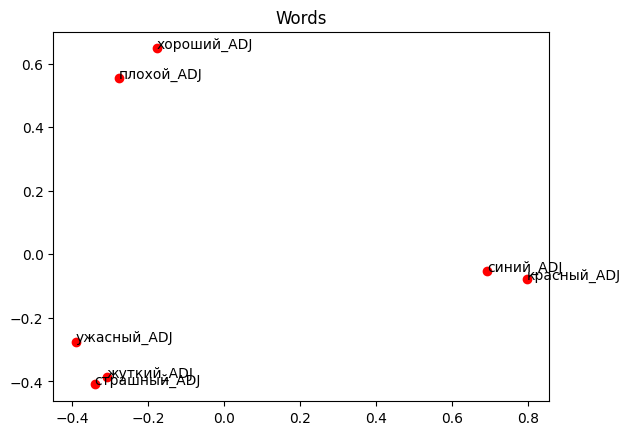

In [24]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

На все словах в модели

In [25]:
pca = PCA(n_components=2)
pca.fit(model[list(model.key_to_index)])
coords = pca.transform(model[words])

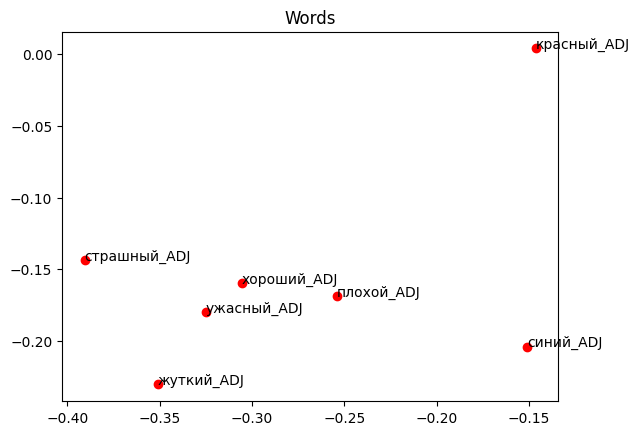

In [26]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

# Кратко о существующих системах

**GloVe**

GloVe берет и строит полную матрицу совместной встречаемости и после этого с помощью алгоритмов уменьшения размерности преобразует ее так, чтобы вектора были опредленной длины


**Word2Vec**

Это уже нейросеть и она на основе корпуса постепенно подбирает коэффициенты (значения в векторах) для каждого слова так, чтобы с помощью них можно было наилучшим образом предсказывать слова по контексту

**FastText**

Если мы берем конкретные слова, мы не можем ничего сказать о тех, что нам не встретились (например, уже видели вагон и строитель, а вот вагоностроителя у нас не было). Если мы возьмем слова не целиком, а в виде буквенных нграмм, то мы сможем сложить неизвестные слова.

**AdaGram**

Все предыдущие модели основаны на графических оболочках и не учитывают многозначность и омонимию. Есть только один вектор для слова "ключ" и мы ничего с этим не можем сделать. AdaGram исходит из предположения, что у слова есть n вариантов и если они действительно отличаются и достаточно часто встречаются, он умеет их разделить.

**BERT и ELMo**

Эти модели не просто могут отличить значения слов. Они корректируют их вектора в зависимости от конкретного контекста: в отрывках “чистый ключ в лесной чаще”, “ключ от квартиры”, "ключ от двери" разные “ключи” (но последние два сильно похожи).

# Значения одного слова
Помотрим, кластеризуются ли значения одного слова

Это [выдача НКРЯ](https://ruscorpora.ru/results?search=CtoCEqICCp8CChMKCWRpc2FtYm1vZBIGCgRtYWluChcKB2Rpc3Rtb2QSDAoKd2l0aF96ZXJvcxJsCgkKA2xleBICCgAKCgoEZm9ybRICCgAKFgoFZ3JhbW0SDQoLKFMpICYgKG5vbSkKCQoDc2VtEgIKAAoVCgdzZW0tbW9kEgoKCHNlbXxzZW14CgwKBnN5bnRheBICCgAKCwoFZmxhZ3MSAgoAEoABChEKA2xleBIKCgjQuNC00YLQuAoKCgRmb3JtEgIKAAoLCgVncmFtbRICCgAKCQoDc2VtEgIKAAoVCgdzZW0tbW9kEgoKCHNlbXxzZW14CgwKBnN5bnRheBICCgAKCwoFZmxhZ3MSAgoAChUKBGRpc3QiDQj///////////8BEAEqLAoICAAQMhgyIAoQBSAAMgRmcmVxQAVaA2xleFoCb25aA2xleGoEMC45NXgAMgIIAToBCTAB) на запрос существительное в им.падеже + лемма "идти" на расстоянии ±1

In [27]:
import pandas as pd
df = pd.read_csv('ruscorpora_idti.csv', sep=';')
df.head()

,word_0,dist_0,word_1,freq,freq_CI_bottom,freq_CI_upper,ipm,ipm_CI_bottom,ipm_CI_upper,hits,hits_CI_bottom,hits_CI_upper
0,речь,1,идти,0.117315,0.115478,0.119177,36.432103,35.861639,37.010419,13642.0,13428.389649,13858.550498
1,дело,1,идти,0.039739,0.038631,0.040877,12.340767,11.996785,12.694194,4621.0,4492.195665,4753.340499
2,речь,-1,идти,0.036651,0.035587,0.037747,11.382028,11.051355,11.722208,4262.0,4138.179552,4389.380331
3,дождь,-1,идти,0.018205,0.017453,0.018990,5.653626,5.419887,5.897250,2117.0,2029.476468,2208.225135
4,время,1,идти,0.017853,0.017107,0.018630,5.544132,5.312676,5.785481,2076.0,1989.331225,2166.373087


In [ ]:
df['v_n'] = df['word_1']+'_'+df['word_0']
df['n'] = df['word_0']+'_NOUN'

In [ ]:
idti = ['идти_VERB']
idti_vec = model[idti]
idti_vec[0]  # - вектор слова идти

array([ 0.012773,  0.007259,  0.065291, -0.066001, -0.065428, -0.059052,
       -0.002641,  0.093191,  0.015395, -0.040557,  0.124618,  0.019924,
       -0.061218,  0.040944, -0.05344 ,  0.004532, -0.091168,  0.0792  ,
       -0.073076,  0.074864,  0.078785,  0.103336,  0.07187 ,  0.044402,
        0.060032,  0.044066,  0.074855, -0.076881, -0.024515,  0.090038,
       -0.003343, -0.050798, -0.025374, -0.01476 ,  0.029961, -0.033216,
       -0.055943,  0.046677, -0.010058, -0.014342,  0.097997, -0.011559,
       -0.00702 , -0.128668,  0.021899,  0.103698, -0.036747, -0.090283,
        0.032325,  0.101701, -0.024777,  0.003045,  0.028501,  0.016129,
       -0.033781, -0.104835,  0.110822,  0.081841, -0.026859,  0.007823,
        0.022391, -0.072881, -0.104883, -0.035318, -0.083499, -0.067093,
       -0.051989,  0.061339,  0.008111,  0.023411,  0.019496, -0.059655,
       -0.030632, -0.008143, -0.013302,  0.096993,  0.007996,  0.057371,
       -0.025938,  0.052128,  0.049065,  0.106073, 

In [ ]:
words = df['n'].to_list()[:50]
X = model[words]
idti_X = idti_vec + X  # получили вектора словосочетаний

In [ ]:
pca = PCA(n_components=2)
coords = pca.fit_transform(idti_X)

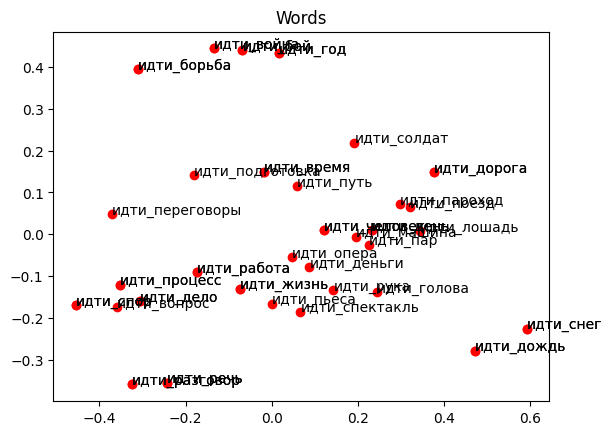

In [ ]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(df['v_n'].to_list()):
    if i<50:
        plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()